In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('E:\\pythonEverything\\COCOMO-81.csv')
df1=pd.get_dummies(df.dev_mode)
df2=pd.concat([df1,df],axis='columns')
df2.columns

Index(['embedded', 'organic', 'semidetached', 'num', 'dev_mode', 'rely',
       'data', 'cplx', 'time', 'stor', 'virt', 'turn', 'acap', 'aexp', 'pcap',
       'vexp', 'lexp', 'modp', 'tool', 'sced', 'loc', 'actual'],
      dtype='object')

In [19]:
cost_drivers = [
    'rely', 'data', 'cplx', 'time', 'stor', 'virt', 'turn',
    'acap', 'aexp', 'pcap', 'vexp', 'lexp', 'modp', 'tool', 'sced'
]

df['EAF'] = df[cost_drivers].prod(axis=1)
df1=pd.get_dummies(df.dev_mode)
df2=pd.concat([df1,df],axis='columns')
df3=df2.drop(['dev_mode','num','rely', 'data', 'cplx', 'time', 'stor', 'virt', 'turn',
     'acap', 'aexp', 'pcap', 'vexp', 'lexp', 'modp', 'tool', 'sced'],axis='columns')
df3.head(2)
df3['locEaf']=df3['loc']*df3['EAF']
df3['logActual']=np.log1p(df3['actual'])


In [3]:
#df3=df3[~(df3['actual']>4000)]
# df3=df3[~(df3['loc']>1000)]
 #df3=df3[~(df3['loc']>1000)]


In [4]:
# df3=df3[~((df3['actual']>=2000) & (df3['actual']<=2500)&(df3['EAF']<=2))]
# df3[(df3['EAF']>4)]


In [178]:
# sns.scatterplot(data=df3,x='loc',y='actual')
# plt.plot([0,500],[0,500],color='red', linestyle='--', label='10x = y')


In [179]:
# for i in ['loc','EAF']:
#     sns.scatterplot(data=df3,x=i,y='actual')
#     plt.show()

In [180]:
#df3[(df3['EAF']<3) & (df3['loc']>1000)]

In [181]:
# sns.scatterplot(data=df3,x='EAF',y='loc')
# plt.show()

In [182]:
# for i in ['loc','EAF','locEaf','actual']:
#     sns.scatterplot(data=df3,x=i,y='actual')
#     plt.show()

In [5]:
#X=df3.drop('actual',axis='columns')
#X
#y=df3.actual
#X['EAF_log'] = np.abs(np.log1p(X['EAF'] - 1))
#X1=X.drop('EAF',axis='columns')
#X
locEaf=['loc','EAF']

df3['locEaf']=df3[locEaf].prod(axis=1)
# import seaborn as sns
# sns.boxplot(df['actual'])
df3 = df3[~((df3['locEaf'] >= 800) & (df3['locEaf'] <= 1000))]
df3 = df3[~((df3['locEaf'] >=350) & (df3['locEaf'] <= 352))]

df3.head()

,embedded,organic,semidetached,loc,actual,EAF,locEaf,logActual
0,True,False,False,113.0,2040.0,2.288115,258.556994,7.621195
1,True,False,False,293.0,1600.0,0.842266,246.784025,7.378384
2,False,False,True,132.0,243.0,0.346245,45.704357,5.497168
3,False,True,False,60.0,240.0,0.998141,59.888457,5.484797
4,False,True,False,16.0,33.0,0.656169,10.498712,3.526361


In [6]:
# Filter points where actual is between 2000 and 4000
filtered_points = df3[(df3['locEaf'] >= 200) & (df3['locEaf'] <= 400)]

# Get their coordinates (loc, actual)
coordinates = list(zip(filtered_points['locEaf'], filtered_points['actual']))
print(coordinates)


[(258.556993755468, 2040.0), (246.78402465500787, 1600.0), (218.97111413522373, 2455.0), (221.9461070112, 702.0)]


In [43]:
df3=df3[~((df3['locEaf'] >=200) & (df3['locEaf'] <= 230)& (df3['actual']<2000))]

In [44]:
# df3=df3[~(df3['locEaf'] >1000)]

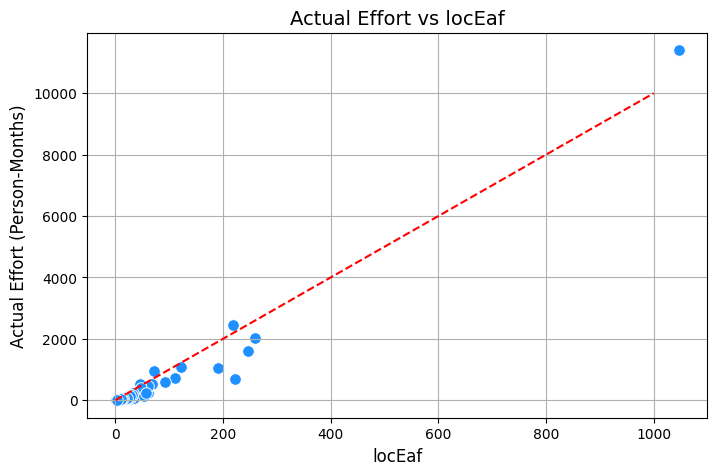

In [8]:


# Scatter plot between actual and loc
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df3, x='locEaf', y='actual', color='dodgerblue', s=70)
# min_val = min(df3['locEaf'].min(), df3['actual'].min())
# max_val = max(df3['locEaf'].max(), df3['actual'].max())
plt.plot([0,1000],[0,10000],color='red', linestyle='--', label='x = y')

# Add titles and labels
plt.title('Actual Effort vs locEaf', fontsize=14)
plt.xlabel('locEaf', fontsize=12)
plt.ylabel('Actual Effort (Person-Months)', fontsize=12)
plt.grid(True)
#plt.tight_layout()
plt.show()


In [9]:
filtered_points = df3[(df3['locEaf'] >= 200) & (df3['locEaf'] <= 400) & (df3['actual']<2000)]
coordinates = list(zip(filtered_points['locEaf'], filtered_points['actual']))
print(coordinates)


# df3.head()

[(246.78402465500787, 1600.0), (221.9461070112, 702.0)]


In [10]:
# import seaborn as sns
# sns.boxplot(df3['EAF'])
df3.head()
X=df3.drop(['actual','locEaf','logActual','semidetached'],axis='columns')
y=df3.actual
y.head()
X.head()

,embedded,organic,loc,EAF
0,True,False,113.0,2.288115
1,True,False,293.0,0.842266
2,False,False,132.0,0.346245
3,False,True,60.0,0.998141
4,False,True,16.0,0.656169


In [10]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
# model=LinearRegression()
# model.fit(X_train,y_train)
# model.score(X_test,y_test)
# y_pred=model.predict(X_test)
# #mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
# print("\nModel Evaluation:")
# #print(f"MAE  : {mae:.2f}")
# print(f"RMSE : {rmse:.2f}")
# print(f"R²   : {r2:.3f}")



In [11]:
df3.head()
X=df3.drop(['actual','EAF','loc'],axis='columns')
y=df3.actual
y.head()

0    2040.0
1    1600.0
2     243.0
3     240.0
4      33.0
Name: actual, dtype: float64

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)
y_pred=model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")
model.score(X_test,y_test)



Model Evaluation:
MAE  : 488.41
RMSE : 1317.47
R²   : 0.820


0.8204206552647726

In [14]:
model.score(X_test,y_test)


0.8204206552647726

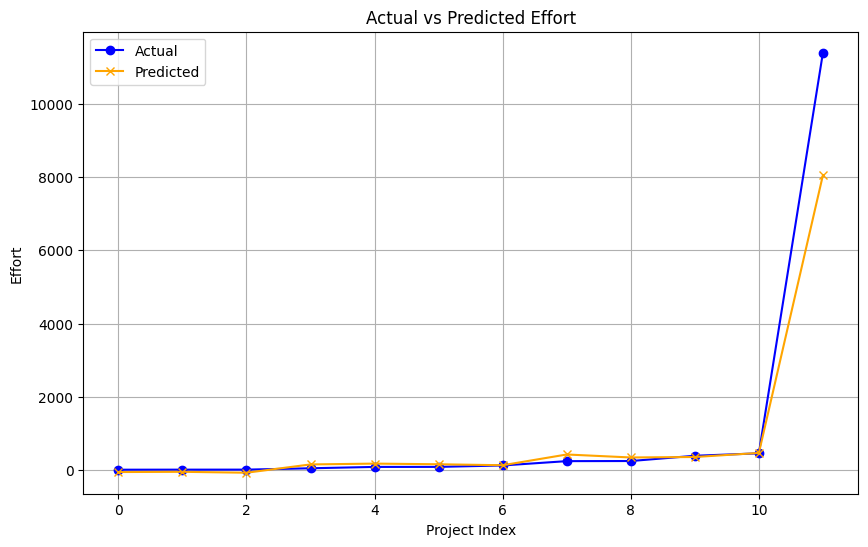

In [23]:
import matplotlib.pyplot as plt

# Optional: Sort values to make the line plot look cleaner
import pandas as pd
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison = comparison.sort_values(by='Actual').reset_index(drop=True)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(comparison['Actual'], label='Actual', color='blue', marker='o')
plt.plot(comparison['Predicted'], label='Predicted', color='orange', marker='x')

plt.title('Actual vs Predicted Effort')
plt.xlabel('Project Index')
plt.ylabel('Effort')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.35796475, 0.66196485, 0.71558524, 0.90805712, 0.8462724 ])

In [17]:
# from sklearn.model_selection import GridSearchCV, ShuffleSplit
# from sklearn.linear_model import LinearRegression, Lasso
# from sklearn.tree import DecisionTreeRegressor
# import pandas as pd

# def find_best_model_using_gridsearchcv(X, y):
#     algos = {
#         'linear_regression': {
#             'model': LinearRegression(),  # Removed 'normalize'
#             'params': {}  # Empty dict if you don't want to tune anything
#         },
#         'lasso': {
#             'model': Lasso(),
#             'params': {
#                 'alpha': [1, 2],
#                 'selection': ['random', 'cyclic']
#             }
#         },
#         'decision_tree': {
#             'model': DecisionTreeRegressor(),
#             'params': {
#                 'criterion': ['friedman_mse'],  # 'mse' is deprecated
#                 'splitter': ['best', 'random']
#             }
#         }
#     }

#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
#     for algo_name, config in algos.items():
#         gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#         gs.fit(X, y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })

#     return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


# find_best_model_using_gridsearchcv(X, y)


In [1]:
# from sklearn.ensemble import RandomForestClassifier # ensemble when multiple algos are used to predict the output
# model=RandomForestClassifier(n_estimators=50)
# model.fit(X_train,y_train)
# model.score(X_test,y_test)

In [15]:
# import seaborn as sns
# sns.boxplot(df3['actual'])


In [16]:
# import matplotlib.pyplot as plt

# # Example scores (replace these with your actual model results)
# scores = {
#     'Linear Regression': 0.903,
#     'Decision Tree': 0.911,
#     'Random Forest': 0.996
# }

# # Plotting
# plt.figure(figsize=(8, 5))
# plt.bar(scores.keys(), scores.values(), color=['skyblue', 'salmon', 'limegreen'])
# plt.ylim(0, 1)  # R² score range
# plt.title("Model Performance Comparison (R² Score)")
# plt.ylabel("R² Score")
# plt.xlabel("Model")
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()
